# Aceleradores de Gradiente.
## Introduccion
Revisar las notas de ML (notas de clase o el libro).

La idea del gradientes encontrar el minimo de una supercie.
Este se encuentra mediante la recursion

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla C( \theta^{(i)}) $$
donde $C=C(\theta)$ es la funcion de costo. (queremos minimzarla).
$\eta$ es el hiperparametro de aprendizaje.

Hay varios tipos de problemas

* **Problemas lineales** (la funcion de costo es cuadratica). Ejemplo tipico, **regresion lineal**. El CG=Conjuage Gradient, es analitico y es rapido (converge en $n$ iteraciones donde $n$ es la dimension del espacio). Pero es muy limitado, por que existen otros problemas.

* **Problemas no-lineales**: Hay muchas clasificaciones, pero vamos clasificarlos por el momento con el criterio de que datos lee.

    * **Batch Gradient Descent**: Usa todos los datos. Y cuando ya halla leido todos los datos, es una **epoca** y vamos la segunda iteracion (segunda epoca y asi...) . Es lento por que usa todos los datos.

    * **Stochastic Gradient Descent** (SGD). Solo lee **un dato**. Es super rapido, pero menos preciso.  Cada vez que lee un dato es una **epoca**

    * **Mini-Batch GD**: Lee grupos de datos (subconjuntos) y por cada subconjunto que lee es una epoca.

En el context "leer" es pasar sobre los datos.

La Figura 3.25 ilustra una superficie con un minimmo y el descenso usando el gradiente (tambien muestra curvas de nivel y como se mueve la trayectoria en estas curvas).



## Learning Rate (hiperparametro de aprendizaje) $\eta$.
Recuerden el paso central para optimizar

$$\theta^{(i)} = \theta^{(i-1)} - \eta \nabla C (\theta^{(i-1)}$ $$

Consideraciones acerca de $\eta$

* El tamanho importa. Muy pequenho hace muy lenta la convergencia, muy grande puede hacer el sistema inestable y diverger.




    

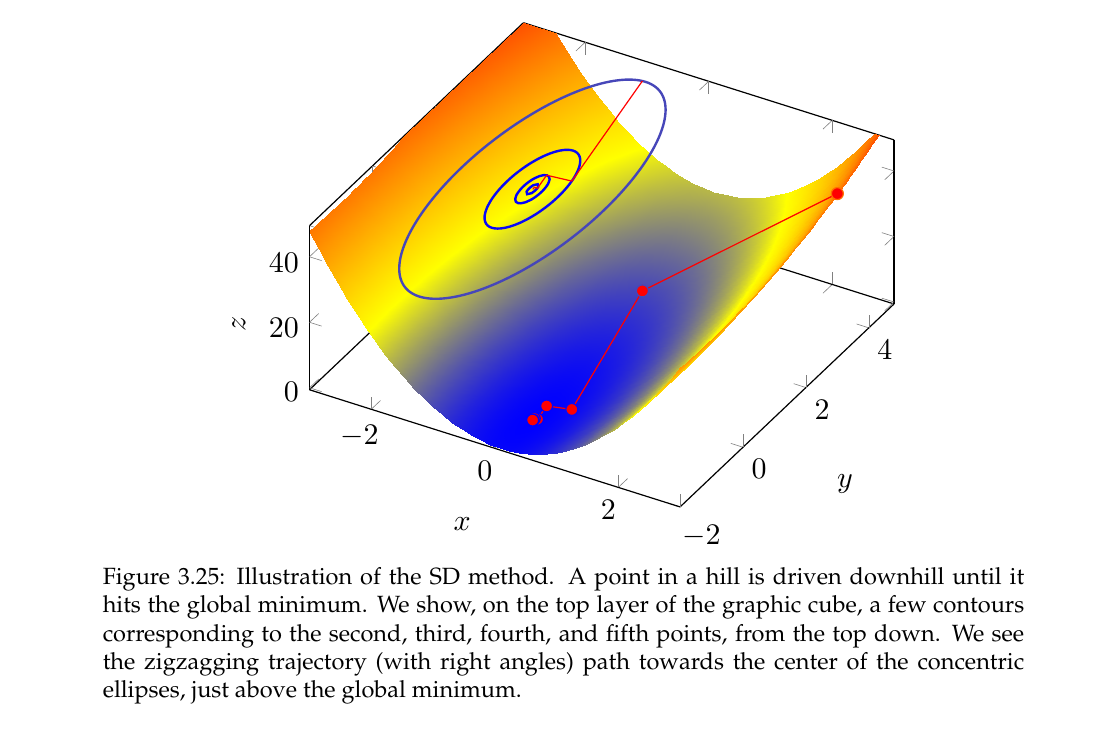

La Figura 3.26 ilustra la importancia del tamanho de $\eta$.

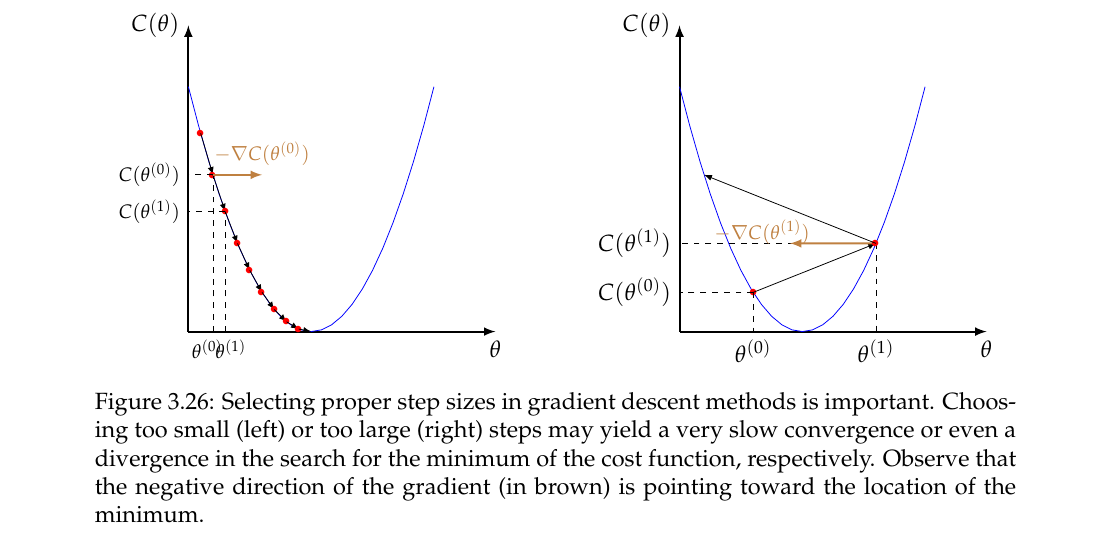

* $\eta$ puede ser constante o variar con la iteracion $i$. Este caso lo estudiamos mas adelante.

* $\eta$ siempre sera positivo. Que tan grande?

* La **convexidad** seria bueno. Lamentablemente los problemas no lineales tiene a no ser convexos.




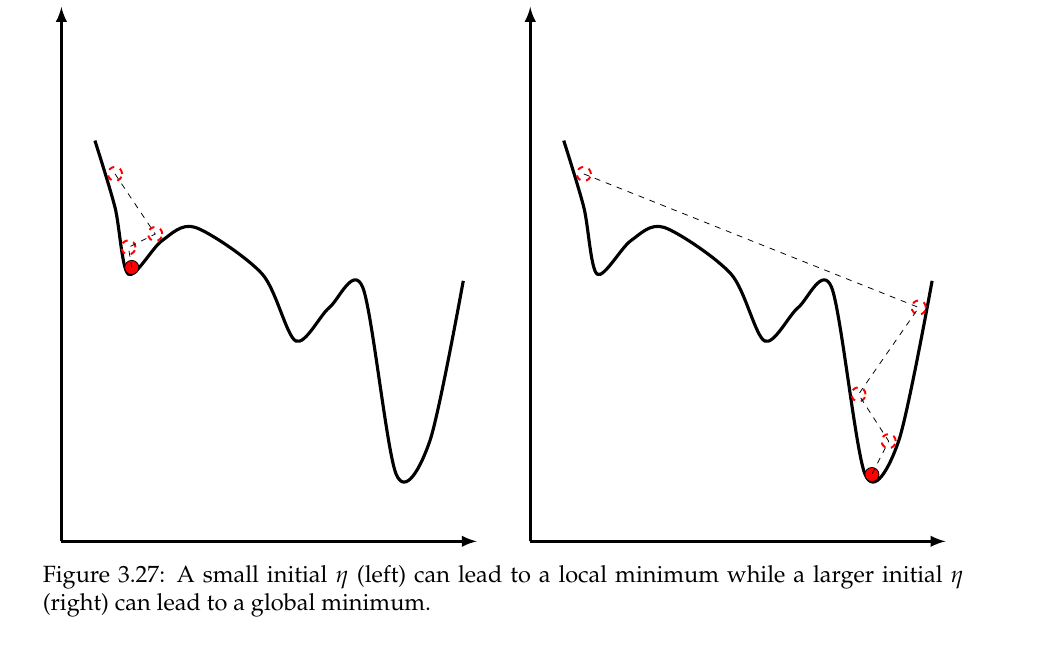

Otro ejemplo donde se muestra que el tamanho de $\eta$ es importante.

Vamos a crear un modelo numerico (lo hice en MX-Net).
Piense en la superficie $z= x_1^2 + 2 x_2^2$.
Vamos buscar el minimo haciendo iteraciones de gradiente con distintos $\eta$.


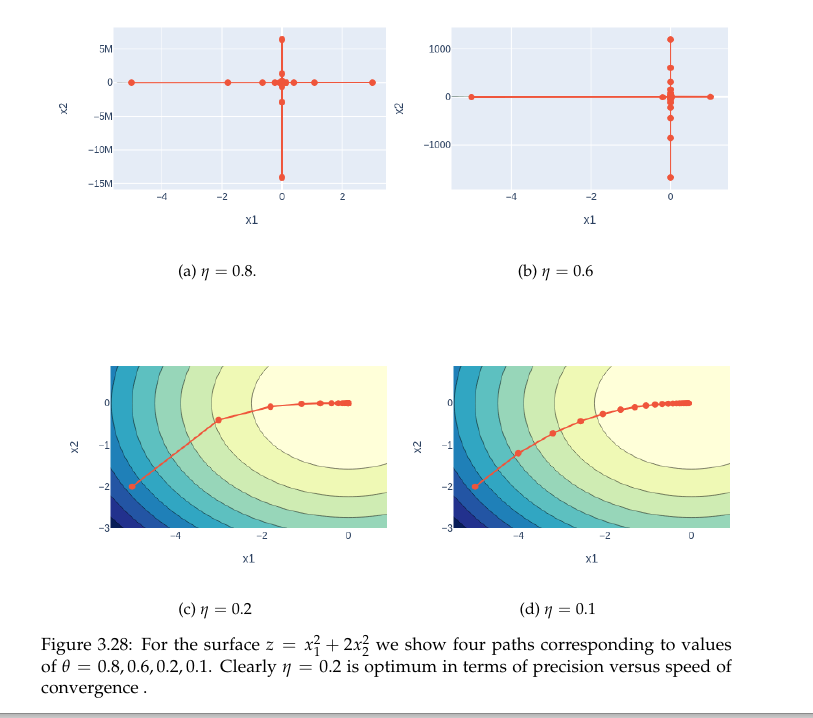

## Metodos de aceleracion de gradiente.
Este es un topico que todavia esta en investigacion. Me voy a enfocar en la parte intuitiva y algoritmica.

Una nota acerca de la notacion. Voy a usar el minibach para ilustrar los procesos.

$$g^{(i)} =   \frac1n \sum_{j=B_i} \nabla C_i(\theta)$$
donde #$B_i=n$. Algunas veces simplicamos todavia mas la notacion usando $\nabla C(\theta)$.

### Metodo del momentum
Fue inventado Poliak in 1964.

[62] B. T. Poliak. Some mehods of speeding up the convergence of iteration methods.
Computational Mathematics and Mathematical Physics, 5:1–17, 1964.

Tambien lo llaman el **heavy ball method**. La idea es que
cuando las superficies o curvas de nivel son muy enlongadas, el metodo es muy lento. Por ejempo $z = 0.1 x_1^2 + 2 x_2^2$

Voy mostrar una imagen, voy a explicar el metodo sobre la imagen y luego escribo el algoritmo (la ecuacion).




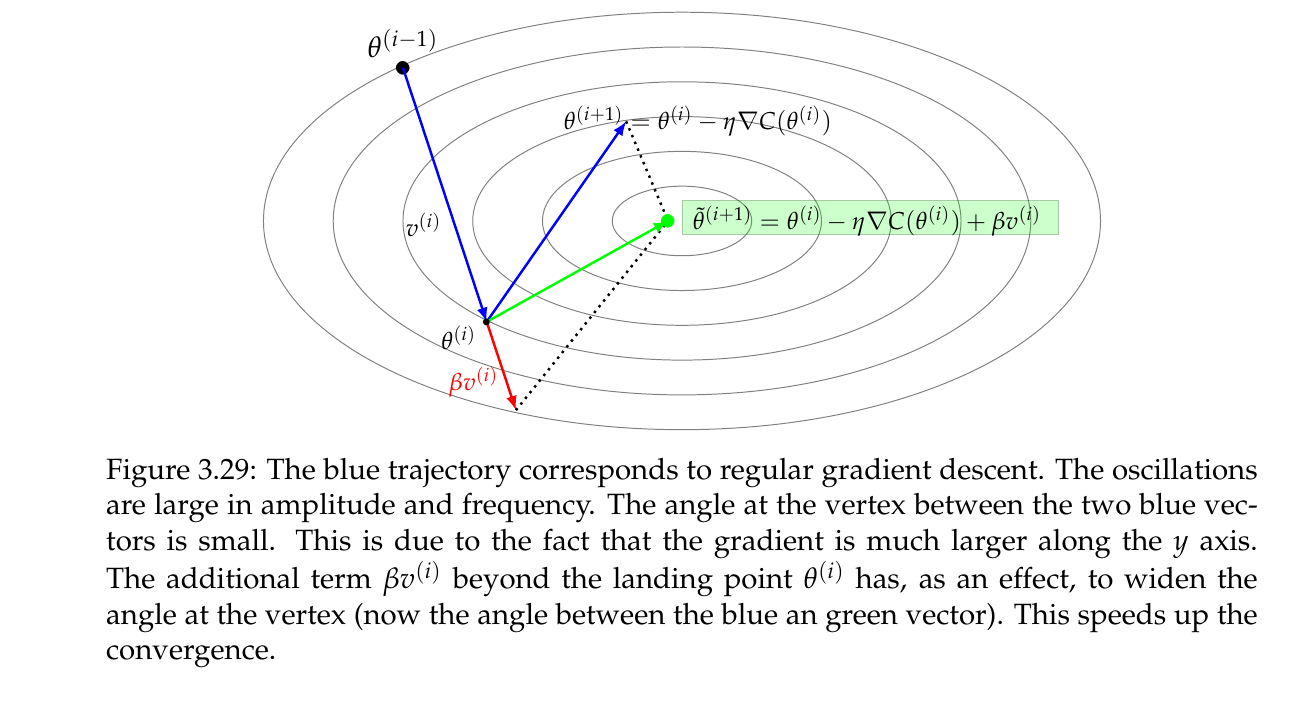

La explicacion fue oral. En la figura, el vector verde indica la nueva direccion a donde nos vamos a desplazar.


$$\theta^{(i+1)} = \theta^{(i)} - \eta g^{(i)} + \beta v^{(i)} \tag{1} $$

Lo podemos escribir tambien como las dos ecuaciones

$$ v^{(i+1)} = \beta v^{(i)} - \eta g^{(i)} $$
$$ \theta^{(i+1)} = \theta^{(i)} + v^{(i+1)}$$


Poliak en su ecuacion (9) tiene la siguiente representacion

$$\theta^{(i+1)} = \theta^{(i)} - \eta g^{(i)} + \beta( \theta^{(i)} - \theta^{(i-1)})  $$

Las siguentes graficas fueron calculadas y creadas con TiKZ.

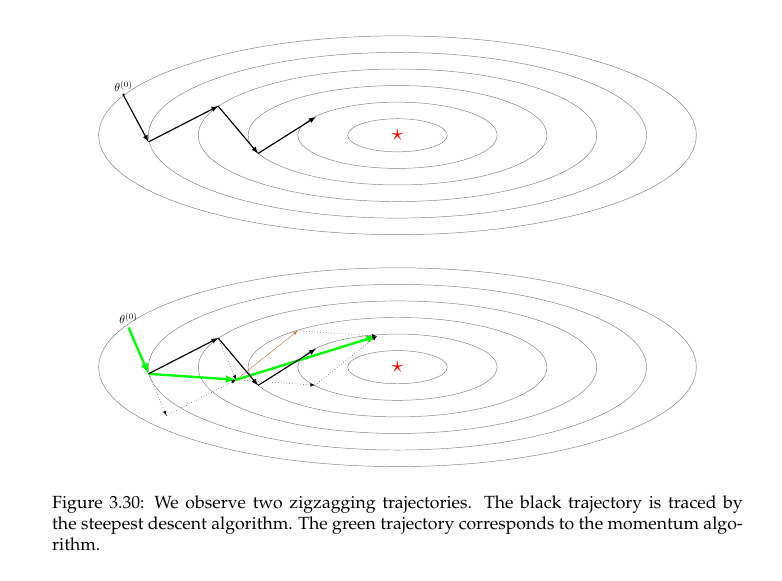

Lo que hace el metodo del momento es reducir la frecuencia y la amplitud de las oscilaciones (zig-zageo)

Ultima version del metodo de momentum.
La velocidad $v^{(i)}$ es un promedio ponderado de la velocidad anterior y el gradiente.

$$v^{(i+1)} = \beta v^{(i)} + (1 - \beta) g^{(i+1)}  $$
$$\theta^{(i+1)} = \theta^{(i)} - \eta v^{(i+1)} $$

Observe que si $\beta=0$, el metodo se reduce al gradiente clasico. Si $\beta=1$, nada esta cambiando.  

El algoritmo usando mini-batch se ilustra a continuacion.

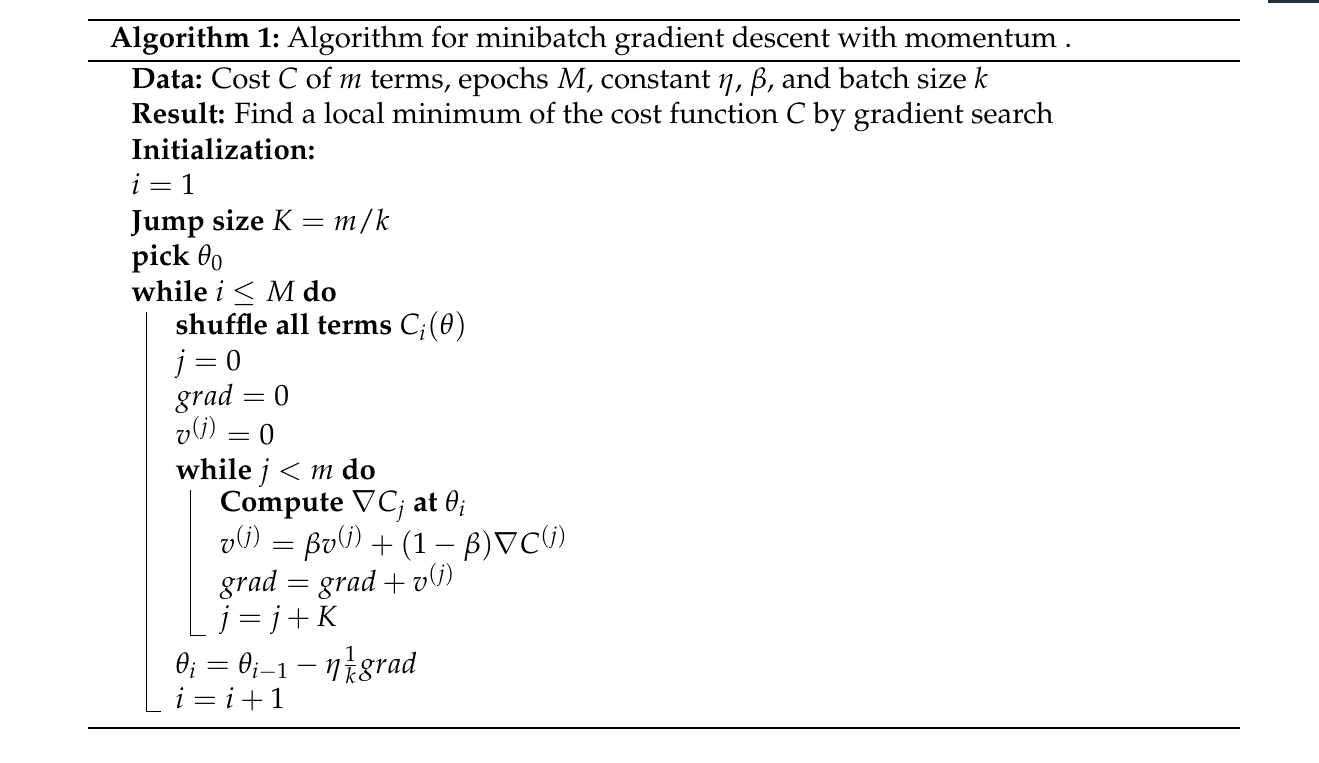

El sitio
[Why momentum really works](https://distill.pub/2017/momentum/)
ayuda a tener un poco de intuicion sobre los hiperparametros $\.ta, \beta$. Segundo punto de la tarea.

Los siguientes ejemplos en Python son en 1D (funciones de una variable), no hay contornos. Lo unico que podemos iulstrar es la trayectoria de caida al minimo. Voy a usar la funcion $f(x) = x^4$. Esta funcion es **muy plana** cerca al minimo.

Comenzamos con la forma del GD.

$$\theta^{(i)} = \theta^{(i-1)} - \eta \nabla f(\theta^{(i-1)}) $$

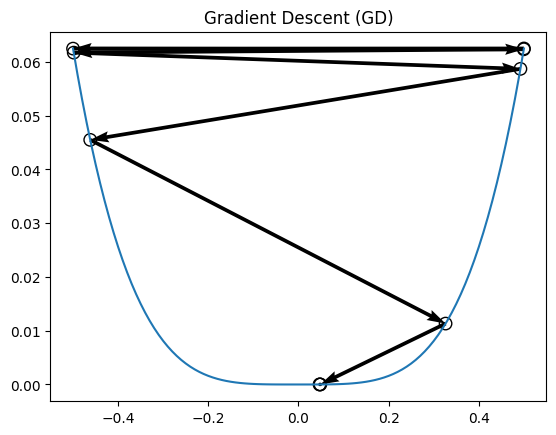

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# funcion simple
def f(x):
    return x**4

# gradiente
def gradf(x):
    return 4*x**3

# eta hard coded
eta=1.9999 # es alto pero vamos a probar mas
# eta=0.1
eps=10**(-6) # ???

# punto de arranque
x = 0.5 # lo llamo theta_0 en las notas

# lista de puntos
xlist = []
ylist = []
gradList = []

M=10 # epocas
for i in  range(M):
    xlist.append(x)
    ylist.append(f(x))
    x = x - eta*gradf(x)

    # if abs(f(x)) < eps:
    #    break
    #
    gradList.append(gradf(x))

# convert list into array, para usar "quiver"
xarr = np.array(xlist)
yarr = np.array(ylist)

xdomain = np.arange(-0.5, 0.51, 0.01)
plt.title("Gradient Descent (GD)")
plt.plot(xdomain, f(xdomain)) # grafica x^4
plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:]-yarr[:-1], \
           scale_units='xy', angles='xy', scale=1)

# grafique los puntos
plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k')
plt.show()




Momentum (Version 1: Poliak):
$$\theta^{(i)} = \theta^{(i-1)} - \eta \nabla f(x) + \beta( \theta^{(i)} - \theta^{(i-1)}) $$

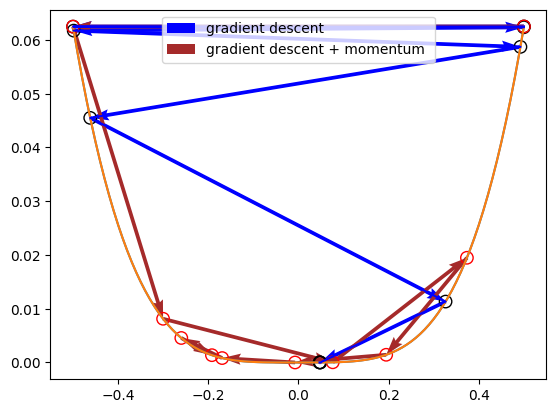

In [2]:
beta = 0.8
# initial point
x = 0.5

# list of points
xlist2 = []
ylist2 = []
gradList2=[]

for i in range(M):
    xlist2.append(x)
    ylist2.append(f(x))
    gradList2.append(gradf(x))
    x = x - eta*gradf(x) + beta*( xlist2[i] - xlist2[i-1])
    # if abs(f(x)) < eps:
     #   break


xdomain = np.arange(-0.5, 0.51,0.01)
# cast lists into numpy array
xarr = np.array(xlist)
yarr = np.array(ylist)

xdomain = np.arange(-0.5, 0.51,0.01)
plt.plot(xdomain, f(xdomain));
# plt.plot(xlist,ylist, color='b');
plt.quiver(xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:]-yarr[:-1], \
           scale_units='xy', angles='xy', scale=1, label="gradient descent", color="blue")

# cast list into np arrays
xarr2 = np.array(xlist2)
yarr2 = np.array(ylist2)
xdomain = np.arange(-0.5, 0.51,0.01)
plt.plot(xdomain, f(xdomain));
plt.plot(xlist,ylist, color='blue');
# plt.quiver(xlist2,ylist2, 0.1, 0.1, color='brown');
plt.quiver(xarr2[:-1], yarr2[:-1], xarr2[1:]-xarr2[:-1], yarr2[1:]-yarr2[:-1], scale_units='xy', \
           angles='xy', scale=1, label="gradient descent + momentum ", color="brown")
plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k');
plt.scatter(xlist2, ylist2, s=80, facecolors='none', edgecolors='r');

plt.legend()

plt.savefig("sdplusmomentum1.pdf")
plt.show();


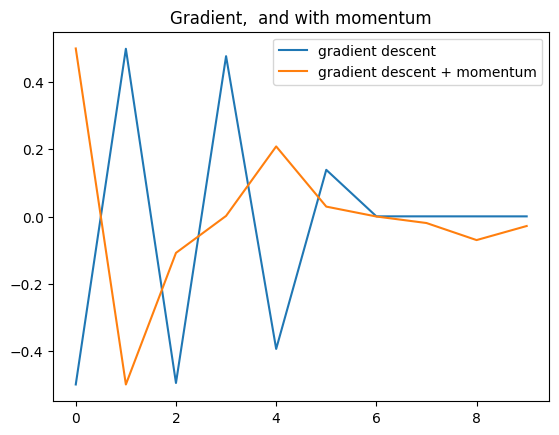

In [3]:
# grafiquemos los gradientes
plt.title("Gradient,  and with momentum")
plt.plot(gradList, label="gradient descent")
plt.plot(gradList2, label="gradient descent + momentum")
plt.legend()
plt.show()


Momemtum (version 2)
$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla f(\theta^{(i)}) + \beta \nabla f(\theta^{(i)}) $$
pregunta: que pasa si $\eta = \beta$?

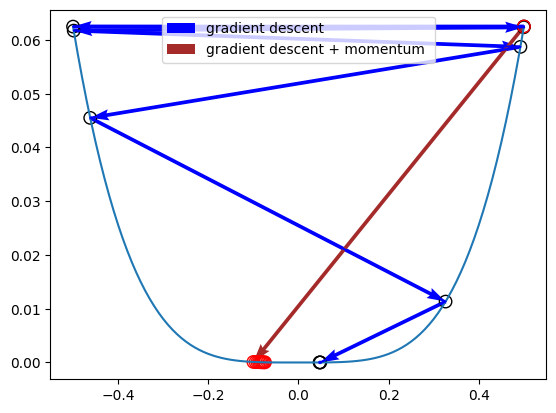

In [8]:
beta=0.8

# initial point
x=0.5

# lista de puntos
xlist2=[]
ylist2=[]
gradList3=[]

M=10

for i in range(M):
    xlist2.append(x)
    ylist2.append(f(x))
    gradList3.append(gradf(x))
    x = x - eta*gradf(x) + beta*gradf(x)

xdomain = np.arange(-0.5, 0.51,0.01)

xarr=np.array(xlist)
yarr=np.array(ylist)

plt.plot(xdomain, f(xdomain));

plt.quiver(xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:]-yarr[:-1], \
           scale_units='xy', angles='xy', scale=1, label="gradient descent", color="blue")

xarr2=np.array(xlist2)
yarr2=np.array(ylist2)
xdomain = np.arange(-0.5, 0.51,0.01)
plt.plot(xlist,ylist, color='blue')

plt.quiver(xarr2[:-1], yarr2[:-1], xarr2[1:]-xarr2[:-1], yarr2[1:]-yarr2[:-1], scale_units='xy', \
           angles='xy', scale=1, label="gradient descent + momentum ", color="brown")

plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k');
plt.scatter(xlist2, ylist2, s=80, facecolors='none', edgecolors='r');

plt.legend()
plt.show()


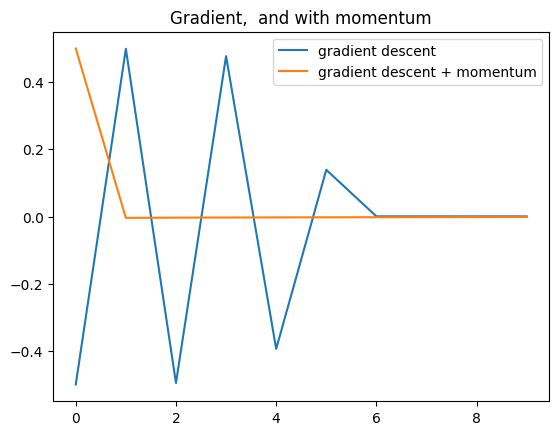

In [9]:
# graficamos los gradientes
# grafiquemos los gradientes
plt.title("Gradient,  and with momentum")
plt.plot(gradList, label="gradient descent")
plt.plot(gradList3, label="gradient descent + momentum")
plt.legend()
plt.show()

Momentum version 3
$$v^{(i)} = \beta v^{(i-1)} + (1 - \beta) g^{(i)} $$
$$\theta^{(i)} = \theta^{(i-1)} - \eta v^{(.)} $$

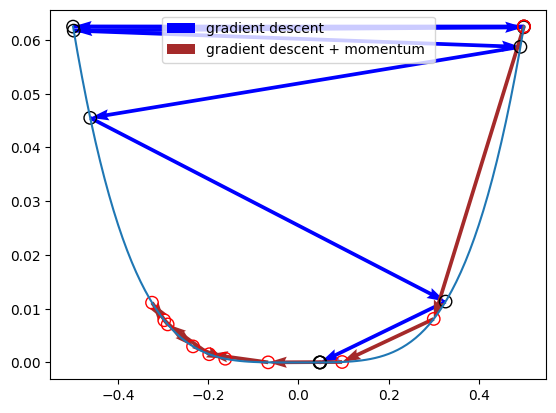

In [11]:
beta=0.8

x=0.5
v=0

# list points
xlist2 = [x]
ylist2 = [f(x)]
gradList4=[]

for i in range(M):
    xlist2.append(x)
    ylist2.append(f(x))
    gradList4.append(gradf(x))
    g=gradf(x)
    v = beta*v + (1-beta)*g
    x = x - eta*v

plt.quiver(xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:]-yarr[:-1], \
           scale_units='xy', angles='xy', scale=1, label="gradient descent", color="blue")

xarr2 = np.array(xlist2)
yarr2 = np.array(ylist2)
xdomain = np.arange(-0.5, 0.51,0.01)
plt.plot(xdomain, f(xdomain));

plt.quiver(xarr2[:-1], yarr2[:-1], xarr2[1:]-xarr2[:-1], yarr2[1:]-yarr2[:-1], scale_units='xy', \
           angles='xy', scale=1, label="gradient descent + momentum ", color="brown")

plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k');
plt.scatter(xlist2, ylist2, s=80, facecolors='none', edgecolors='r');

plt.legend()
plt.show()



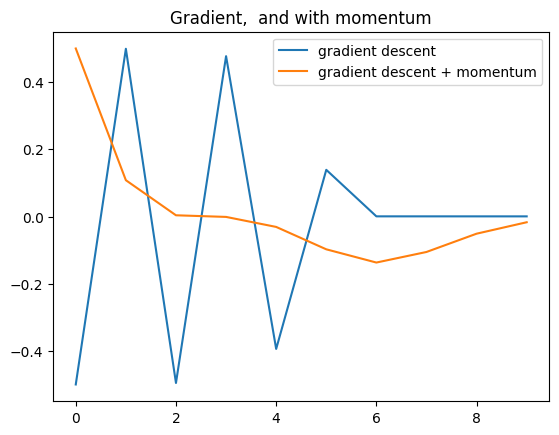

In [12]:
# graficamos los gradientes
# grafiquemos los gradientes
plt.title("Gradient,  and with momentum")
plt.plot(gradList, label="gradient descent")
plt.plot(gradList4, label="gradient descent + momentum")
plt.legend()
plt.show()

## Nesterov.
Nesterov Gradient Accelerator (NGA). Publicado por Yurii Nestorv (Nesterov fue estudiante Ph.D de Poliak). 1983.

El Nesterov es una variacion pequenha el Poliak. Lo que hace es evaluar el gradiente no en $\theta^{(i)}$ sino en $\theta^{(i)} + \beta v^{(i)}$.

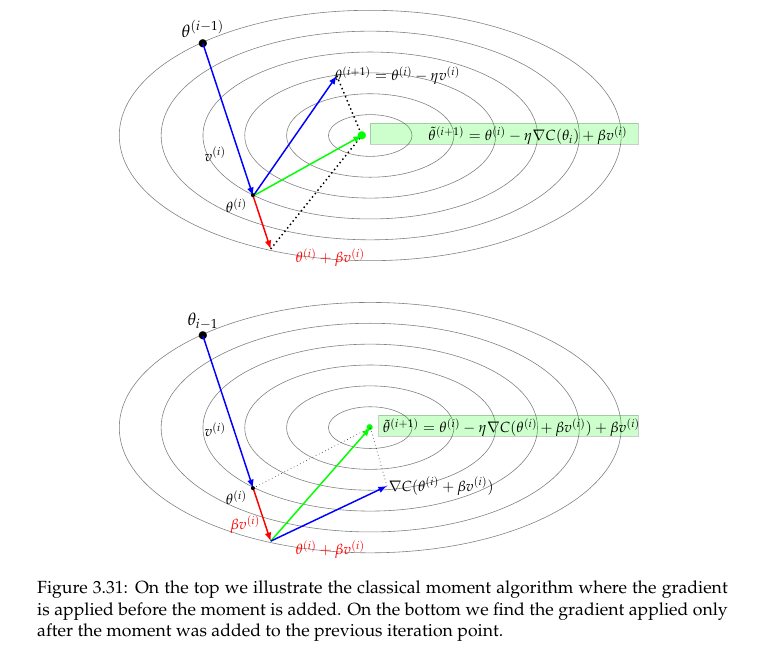

El metodo se resume en

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla C( \theta^{(i)} + \beta v^{(i)}) + \beta v^{(i)}.$$

Lo podemos escribir en dos pasos

\begin{eqnarray}
v^{(i+1)} &=& \beta v^{(i)} - \eta g^{(i)}(\theta^{(i)} + \beta v^{(i)}) \\
\theta^{(i+1)} &=& \theta^{(i)} + v^{(i+1)}
\end{eqnarray}

Nesterov asegura que el metodo de el mejor.

### AdaGrad (Adaptive Gradient)
#### Introduccion
Lo introdujo Duchi et al., 2011.
Hasta este punto $\eta$ es constante. Una novedad con AdaGrad es que $\eta$ depende de la iteracion $i$. Entonces es algo como

$$\theta^{(i+1)} = \theta^{(i)} - \eta^{(i)} g^{(i)} $$
"adaptive"?

La cuestion es que hay situaciones donde las componentes del gradiente son muy desiguales y esto esta correlacionado con elipses aplanadas y un metodo de convergencia lento.





Planteamos el problema en 2D.
Asuma una funcion cuadratica

$$f(x) = \frac12 x^T A x - b^T x + c \quad , \quad x \in \mathbb{R}^n \quad , \quad A \in \mathbb{R}^{n \times n} \quad , c \in \mathbb{R} $$


$A$ es positiva definida (simetrica). En ML probamos usando calculo matricial que

$$\nabla f = Ax - b $$
el minimo se da cuando $\nabla f=0$,

$Ax = b$
Recuerden el teorema espectral

$$A = Q \Lambda Q^T $$
donde $Q$ es una matriz ortogonal y $\Lambda$ es diagonal, Las columnas de $Q$ son los autovectores de $A$ y los numeros en la diagonal son los autvalores de $A$.
Podemos hacer cambio de base (coordenadas)

$$x' = Q^T x \; x = Q x' \quad , x'^T = x^T Q $$
entonces

$$f(x') = \frac12 x^T Q \Lambda Q^T x - b^Tx + c = \frac{1}{2} x'^T \Lambda x' - b^T Q x' + c $$
y el gradiente es


$$\nabla f(x') = \Lambda x' - Q^T b $$

El "condition number" (numero de condicion) es

$$\kappa = \frac{\lambda_1}{\lambda_n}= \frac{\sigma_1}{\sigma_n} $$
$\sigma_1 = \sqrt{\lambda_1^2}$
$\sigma_2= \sqrt{\lambda_2^2}$

Si el numero de condicion es muy grande es  por que entre $\lambda_1$ y $\lambda_n$ existe una diferencia aprecible. Esto implica que las curvas de nivel (superficies nivel) son aplanadas y la convergencia es lenta. Lo quisieramos es **regular** corrigiendo este numero de condicion.

**Ejemplo 3.4.1**: Observe la Figura 3.32. Las superficies (curvas) de nivel correspondent a la ecuacion







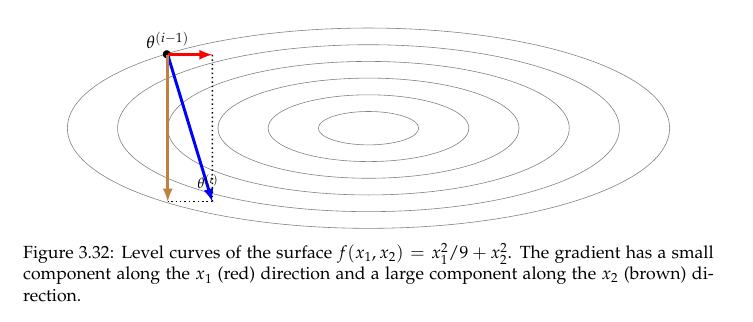

$$f(x_1, x_2) = \frac{x_1^2}{9} + x_2^2 = \frac12
\left ( \frac{2 x_1^2}{9}  + 2 x_2^2  \right )
=\frac12 (x_1 \; x_2)  \begin{pmatrix} 2/9 & 0 \\ 0 & 2 \end{pmatrix} \binom{x_1}{x_2}$$

Veamos el gradiente de $f((x_1, x_2))$

$$\nabla f(x_1, x_2) = 2 \left ( \frac{x_1}{9} , x_2 \right )   $$

Escojamos el punto $(x_1, x_2)=(-2, 2.2)$. Ese punto se marca como una bola negra en $\theta^{(i-1)}$ en la Figura 3.32.

$$\nabla f(-2, 2.2) = (-0.444, 4.4) $$

#### Algoritmo
AdaGrad usa un $\eta$ variable que es $\eta^{(i)}$

$$\eta^{(i)} = \frac{\eta}{\sqrt{G^{(i)} + \epsilon}} $$
donde

$$G^{(i)} = \sum_{j=1}^i g^{(j)} \circ g^{(j)} $$

Donde $\circ$ el producto Hadamard, de forma que cada
$g^{(j)} \circ g^{(j)}$ es un vector con los cuadrados de las componentes del gradiente $g$ en la iteracion $j$.
En este sentido  $G^{(i)}$ es un vector que **acumula** la **historia** del gradiente desde la iteracion (epoca) $j=1$, hasta la iteracion $j=i$. La componente $k$ de este vector es

$$G_k^{i} = \sum_{j=1}^i \left ( g_k^{(j)} \right )^2  $$
donde $g_k^{(i)}$ es la componente $k$ de el gradiente $g^{(j)}$ en la iteracion $j$.

En este sentido $\eta^{(i)}$ no solo cambia con $i$ sino que ya no es escalar. $\eta^{(i)}$ es un vector, donde la componente $k$ esta dada por

$$\eta_k^{(i)} = \frac{\eta}{\sqrt{G_k^{(i)} + \epsilon}} $$
donde $\epsilon >0$, es un valor pequenho para evitar la division por 0 o por numeros muy pequenhos.

Para mejor explicar las formulas de arriba podemos a ver a $g$ como un tensor de rango dos (matriz). Si la funcion de costo esta en $\mathbb{R}^n$, y consideramos $m$ iteraciones, entonces $g$ es la matriz $m \times n$.


$$g = (g_{k}^{(i)}) =
\begin{pmatrix}
g_1^{(1)} & g_2^{(1)} & \cdots & g_n^{(1)} \\
g_1^{(2)} & g_2^{(2)} & \cdots & g_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots  \\
g_1^{(m)} & g_2^{(m)} & \cdots & g_n^{(m)} \\
\end{pmatrix}
$$

$k=1, \cdots, n$ , $i=1, \cdots, m$

Cada gradiente se escribe

$$g_k^{(i)} = \frac{\partial C}{\partial \theta_k^{(i)}}(\theta^{(i)}) $$
donde usamos la notacion

* $g_k$ una columna de $g$ (gradiente a traves de las iteraciones)
* $g^{(i)}$ la fila de $g$ (gradiente en la iteracion $i$).

A lo ultimo el "update" es


$$\theta^{(i+1)} = \theta^{(i)} - \eta^{(i)} \circ g^{(i)}. $$
Este es el algoritmo de AdaGrad.

##### Intuicion del algoritmo
* El parametro $\eta^{(i)}$ se ajusta dinamicamente al gradiente.

* Las componentes grandes del gradiente se penalizan con la normalizacion haciendo el numero de condicion mas pequenho.  Se **redondean** las elipses.

* Un gradiente pequenho se amplifica.

* En vez de dividir por las componentes del gradiente dividimos por la **historia acumulada**